In [84]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Load Data Files
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [87]:
# Combine the data into a single dataset
merged_Mouse_Clinical_Trial_data_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
CT_data_df = merged_Mouse_Clinical_Trial_data_df
# Display the data table for preview
CT_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [88]:
#create new DF to hold Drug, Timepoint & Tumor Volume columns
tumor_response_df = CT_data_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
#Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_response = pd.DataFrame(tumor_response_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean())
#reset index
mean_tumor_response.reset_index(inplace=True)
#rename columns
mean_tumor_response_df = mean_tumor_response.rename(columns = {"Tumor Volume (mm3)" : "Mean Tumor Volume (mm3)"})
# Preview DataFrame
mean_tumor_response_df.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [89]:
# find Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tumor_response = pd.DataFrame(tumor_response_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem())
#reset index
std_err_tumor_response.reset_index(inplace=True)
drug_std_err_df = std_err_tumor_response.rename(columns = {"Tumor Volume (mm3)" : "Std Error - Tumor Volume (mm3)"})
# Preview DataFrame
drug_std_err_df.head()

,Drug,Timepoint,Std Error - Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [90]:
# Minor Data Munging to Re-Format the STD Error DF
std_err_by_drug = drug_std_err_df.pivot(index ="Timepoint", columns ='Drug', values = "Std Error - Tumor Volume (mm3)")
# Preview that Reformatting worked
std_err_by_drug

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [92]:
# Minor Data Munging to Re-Format the Mean DF
tumor_response_by_drug_df = mean_tumor_response_df.pivot(index ="Timepoint", columns ='Drug', values = "Mean Tumor Volume (mm3)") 
# Preview that Reformatting worked
tumor_response_by_drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


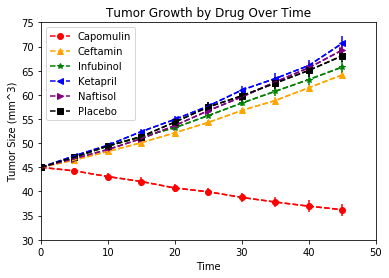

In [93]:
# Generate the Plot (with Error Bars)
time = [0,5,10,15,20,25,30,35,40,45]
#plot for Capomulin
plt.plot(time, tumor_response_by_drug_df["Capomulin"], marker = "o", color="red", label="Capomulin", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Capomulin"], yerr = std_err_by_drug["Capomulin"], color="red", linestyle="dashed", label = "" )
#plot for Ceftamin
plt.plot(time, tumor_response_by_drug_df["Ceftamin"], marker = "^", color="orange", label="Ceftamin", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Ceftamin"], yerr = std_err_by_drug["Ceftamin"], color="orange", linestyle="dashed", label = "")
#plot for Infubinol
plt.plot(time, tumor_response_by_drug_df["Infubinol"], marker = "*", color="green", label="Infubinol", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Infubinol"], yerr = std_err_by_drug["Infubinol"], color="green", linestyle="dashed", label = "")
#plot for Ketapril
plt.plot(time, tumor_response_by_drug_df["Ketapril"], marker = "<", color="blue", label="Ketapril", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Ketapril"], yerr = std_err_by_drug["Ketapril"], color="blue", linestyle="dashed", label = "")
#plot for Naftisol
plt.plot(time, tumor_response_by_drug_df["Naftisol"], marker = ">", color="purple", label="Naftisol", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Naftisol"], yerr = std_err_by_drug["Naftisol"], color="purple", linestyle="dashed", label = "")
#plot for Placebo 
plt.plot(time, tumor_response_by_drug_df["Placebo"], marker = "s", color="black", label="Placebo", linestyle="dashed")
plt.errorbar(time, tumor_response_by_drug_df["Placebo"], yerr = std_err_by_drug["Placebo"], color="black", linestyle="dashed", label = "")
#format axis
plt.xlim(0, 50)
plt.ylim(30, 75)
#label
plt.xlabel("Time")
plt.ylabel("Tumor Size (mm^3)")
plt.title("Tumor Growth by Drug Over Time")
#legend
plt.legend(loc="upper left")
# Save the Figure
plt.savefig("Plot_Images/Tumor_Growth_by_Drug_over_Time.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [94]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_by_drug = CT_data_df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_response = pd.DataFrame(metastatic_by_drug.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())
#rename columns
std_err_metastatic_response = metastatic_response.rename(columns = {"Metastatic Sites" : "Mean Metastatic Sites"})
# Preview DataFrame
std_err_metastatic_response.head()

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [95]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_by_drug = CT_data_df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_err_response = pd.DataFrame(metastatic_by_drug.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem())
#rename columns
mean_metastatic_response = metastatic_err_response.rename(columns = {"Metastatic Sites" : "Std Error - Metastatic Sites"})
# Preview DataFrame
mean_metastatic_response.head()

Std Error - Metastatic Sites
Drug      Timepoint                              
Capomulin 0                              0.000000
          5                              0.074833
          10                             0.125433
          15                             0.132048
          20                             0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


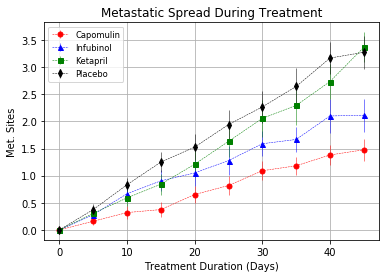

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

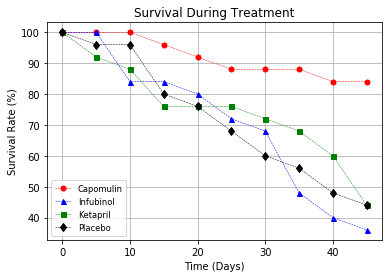

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

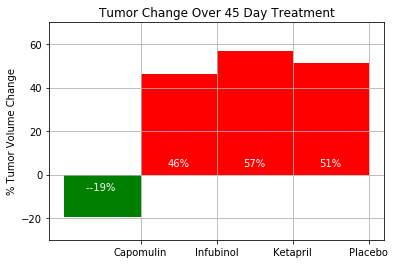